In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('F1Score_55-66 - Grouping_Labels(score=0.25).csv')
df.head()

,No Label,No Model,Labels,Dataset,Train_Images,Val_Images,Test_Images,Model,Train_F1,Val_F1,Test_F1
0,1,1,horizontal_white,4,5718,714,714,yolo-v4-57-21042022,0.6953,0.5602,0.5403
1,1,2,horizontal_white,4,5718,714,714,yolo-v4-60-23042022,0.7608,0.5772,0.5462
2,1,3,horizontal_white,6,5718,714,714,yolo-v4-55-21042022,0.6738,0.5377,0.5172
3,1,4,horizontal_white,6,6391,798,798,yolo-v4-59-23042022,0.6749,0.5607,0.5533
4,1,5,horizontal_white,7,1096,137,137,yolo-v4-63-13052022,0.7631,0.5561,0.4679


In [3]:
defect_label2 = np.unique(df.Labels.to_list())
df_features = df[['Labels','Train_Images', 'Model', 'Train_F1']]
defect_label = []
for x in defect_label2:
    if len(df_features.loc[df_features['Labels']==x])>1:
        defect_label.append(x)
#     print(x)

FileNotFoundError: [Errno 2] No such file or directory: 'cross/horizontal_black_train_test.png'

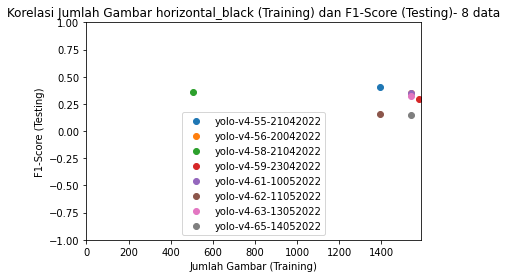

In [4]:
df_features = df[['Labels','Train_Images', 'Model', 'Test_F1']]
df_features.sort_values('Test_F1')
for idxd, deflabel_ in enumerate(defect_label):
    plt.rcParams["figure.figsize"] = (10,10)
    plt.rcParams['figure.facecolor']='white'
    horblack = df_features.loc[df_features['Labels']==defect_label[idxd]]
    
    # horblack_sorted = horblack.sort_values('Test_F1')
    horblack_train_labels = horblack[['Train_Images', 'Labels']]
    horblack_imgs = np.asarray(horblack_train_labels[['Train_Images']])
    horblack_imgs.reshape(-1, 1)

    f1_horblack_model = horblack[['Model', 'Test_F1']]
    f1_horblack = np.asarray(f1_horblack_model[['Test_F1']])

    
    model_name = np.unique(f1_horblack_model.Model.to_list())
    label_name = np.unique(horblack_train_labels.Labels.to_list())
    ln = []
    for idxm, model in enumerate(model_name):
        ln.append(model)
    sc = StandardScaler()
    horblack_imgs_sc = sc.fit_transform(horblack_imgs)
    X_set, y_set = sc.inverse_transform(horblack_imgs_sc), f1_horblack
    X1 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10))
    # print(len(horblack), len(f1_horblack))
    # print(len(X_set), len(y_set))
    plt.xlim(0, X1[0].max())
    plt.ylim(-1, 1)

    for idx, _ in enumerate(X_set):
        # print(_, y_set[idx])
        plt.scatter(_, y_set[idx])

    
    plt.title(f'Korelasi Jumlah Gambar {defect_label[idxd]} (Training) dan F1-Score (Testing)- {len(horblack)} data')
    plt.xlabel('Jumlah Gambar (Training)')
    plt.ylabel('F1-Score (Testing)')
    plt.legend(ln, loc=8)
    plt.savefig(f'cross_test/{defect_label[idxd]}_train_test.png')
    plt.show()

    # print()
    horblack = df_features

In [ ]:
df_features = df[['Labels','Train_Images', 'Model', 'Val_F1']]
df_features.sort_values('Val_F1')
for idxd, deflabel_ in enumerate(defect_label):
    plt.rcParams["figure.figsize"] = (10,10)
    plt.rcParams['figure.facecolor']='white'
    horblack = df_features.loc[df_features['Labels']==defect_label[idxd]]
    
    # horblack_sorted = horblack.sort_values('Val_F1')
    horblack_train_labels = horblack[['Train_Images', 'Labels']]
    horblack_imgs = np.asarray(horblack_train_labels[['Train_Images']])
    horblack_imgs.reshape(-1, 1)

    f1_horblack_model = horblack[['Model', 'Val_F1']]
    f1_horblack = np.asarray(f1_horblack_model[['Val_F1']])

    
    model_name = np.unique(f1_horblack_model.Model.to_list())
    label_name = np.unique(horblack_train_labels.Labels.to_list())
    ln = []
    for idxm, model in enumerate(model_name):
        ln.append(model)
    sc = StandardScaler()
    horblack_imgs_sc = sc.fit_transform(horblack_imgs)
    X_set, y_set = sc.inverse_transform(horblack_imgs_sc), f1_horblack
    X1 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10))
    # print(len(horblack), len(f1_horblack))
    # print(len(X_set), len(y_set))
    plt.xlim(0, X1[0].max())
    plt.ylim(-1, 1)

    for idx, _ in enumerate(X_set):
        # print(_, y_set[idx])
        plt.scatter(_, y_set[idx])

    
    plt.title(f'Korelasi Jumlah Gambar {defect_label[idxd]} (Training) dan F1-Score (Testing)- {len(horblack)} data')
    plt.xlabel('Jumlah Gambar (Training)')
    plt.ylabel('F1-Score (Testing)')
    plt.legend(ln, loc=8)
    plt.savefig(f'cross_val/{defect_label[idxd]}_train_val.png')
    plt.show()

    # print()
    horblack = df_features